In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Se cargan los datos y se observan algunas caracteristicas preliminares.

- Cuantas facturas hay por estado
- Cunatas facturas por estado tienen un financiamiento por parte de Xepelin mayor a 0.
- Se obtuvo un cuadro con las correlaciones entre las variables. En particular se busca ver si la columna target, es decir 'amountFinancedByXepelin', tiene correlaciones con el resto de las columnas.
- Se graficaron cuantas repeticiones tenian los distintos Id de los pagadores.

In [3]:
path = "drive/My Drive/Xepelin/data_test2.csv"
df = pd.read_csv(path)
df.head()

,PayerId,ReceiverId,invoiceId,paidAt,amount,amountfinancedByXepelin,status
0,53,10,18660729,8/23/21 00:00,1490.46,0.00,PAID
1,93,11,18660730,3/22/21 00:00,6418.28,624.48,PAID
2,122,12,18660731,2/18/21 00:00,27979.20,10520.15,PAID
3,85,13,18660732,3/15/21 00:00,183070.77,79421.63,PAID
4,87,14,18660733,7/23/21 00:00,20532.00,20532.00,PAID


In [4]:
df['status'].value_counts()

PAID          892
PROCESSING    269
FAILED         39
Name: status, dtype: int64

In [5]:
df[(df['amountfinancedByXepelin']>0)]['status'].value_counts()

PAID          221
PROCESSING     53
FAILED         12
Name: status, dtype: int64

In [6]:
df['month'] = pd.DatetimeIndex(df['paidAt']).month
df.head()

,PayerId,ReceiverId,invoiceId,paidAt,amount,amountfinancedByXepelin,status,month
0,53,10,18660729,8/23/21 00:00,1490.46,0.00,PAID,8.0
1,93,11,18660730,3/22/21 00:00,6418.28,624.48,PAID,3.0
2,122,12,18660731,2/18/21 00:00,27979.20,10520.15,PAID,2.0
3,85,13,18660732,3/15/21 00:00,183070.77,79421.63,PAID,3.0
4,87,14,18660733,7/23/21 00:00,20532.00,20532.00,PAID,7.0


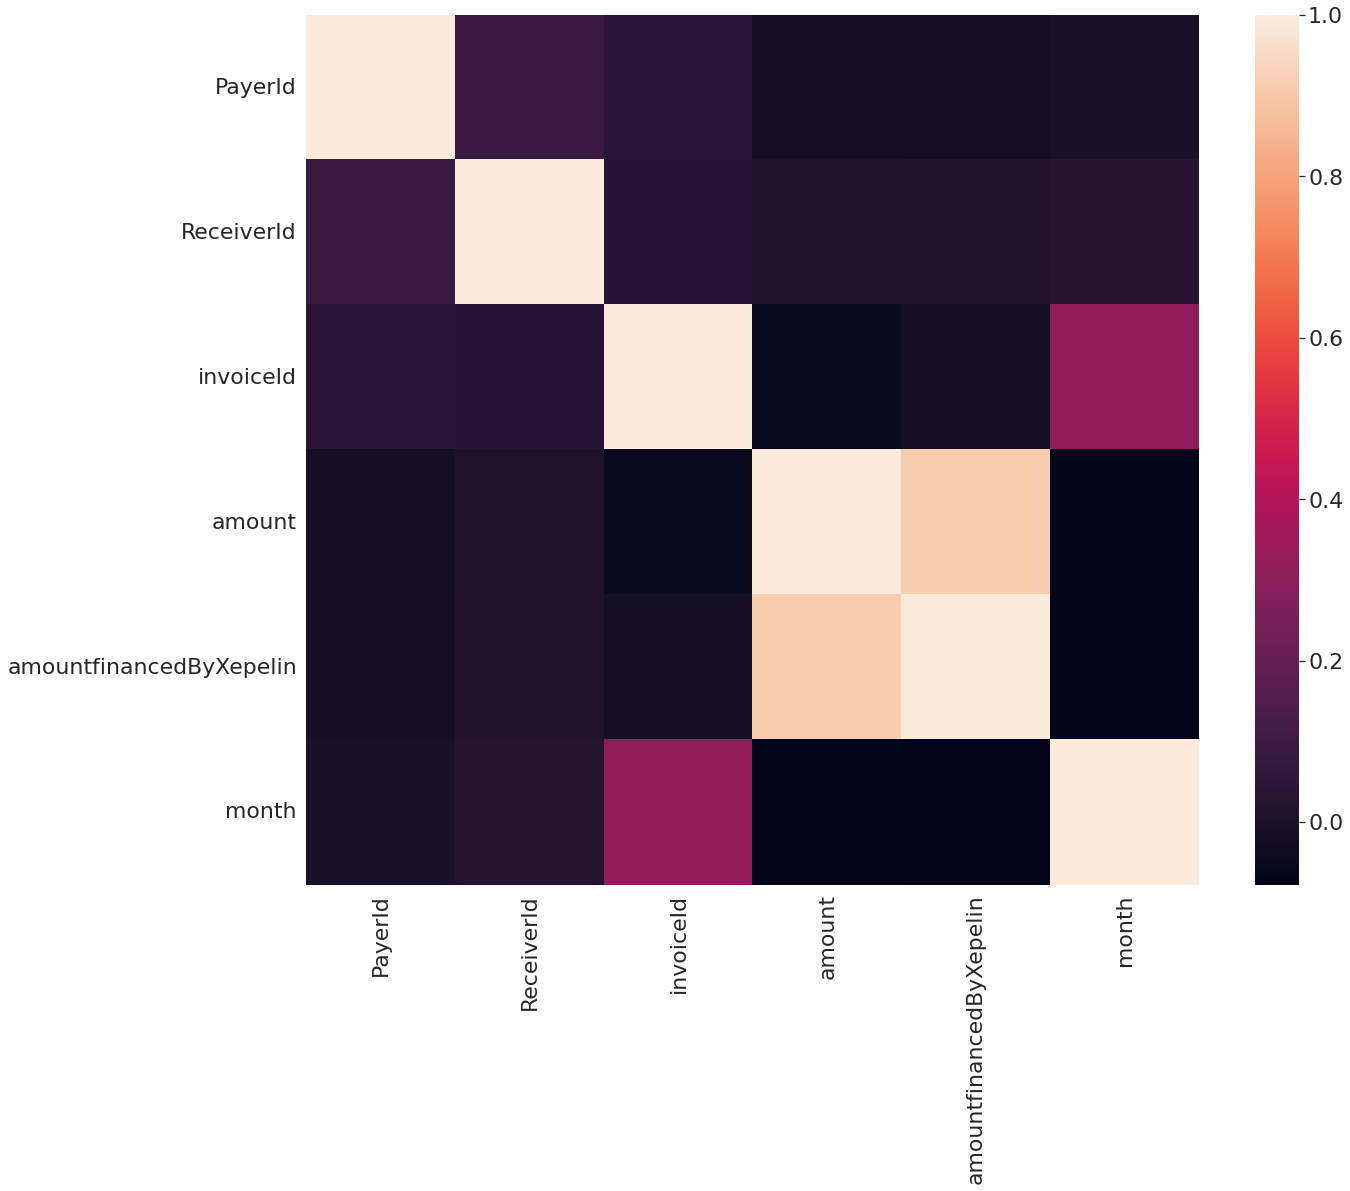

In [17]:
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(df.corr(), ax=ax)

#fig.suptitle('Matriz de Correlación', size=24, y=0.92)
plt.show()

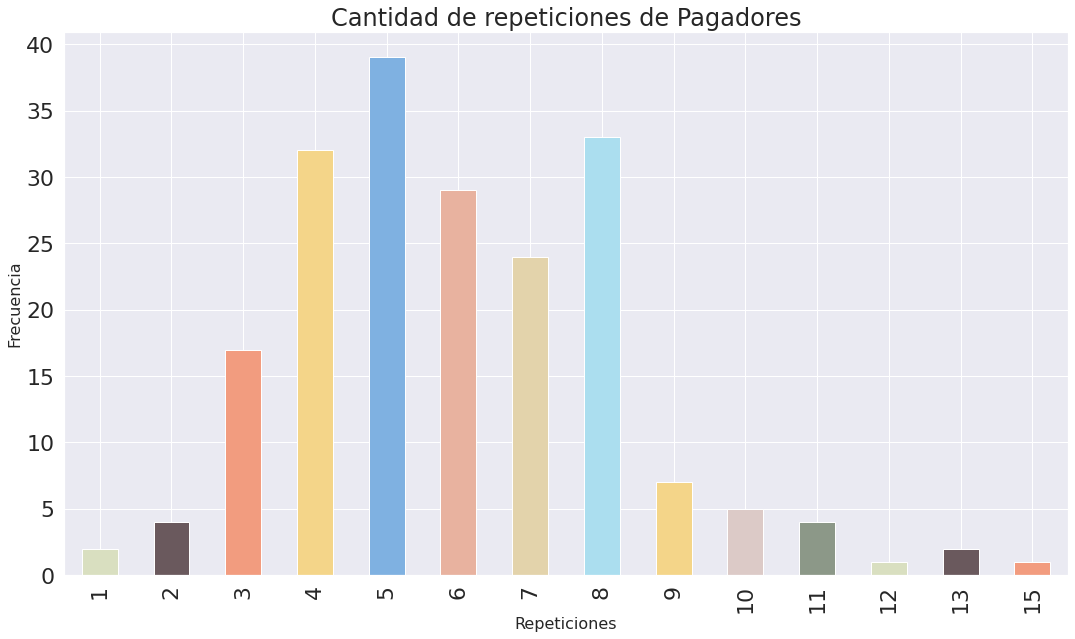

In [25]:
agrupados = df.groupby(by=['PayerId']).count()
agrupados['amount'].value_counts().sort_index().plot(kind='bar',figsize=(18,10),color=['#d9dfc0', '#6a595d',
            '#f29c7f','#f4d589',
            '#7fb1e1',
            '#e8b29f',
            '#e3d3ab',
            '#abdeef',
            '#f4d589',
            '#dccac7',
            '#8c9888'])
plt.ylabel('Frecuencia',fontsize=16)
plt.xlabel('Repeticiones',fontsize=16)
plt.title('Cantidad de repeticiones de Pagadores')
plt.show()

Luego, se agruparon los datos segun el mes de pago y se graficaron la cantidad de facturas por mes, movimiento de Xepelin por mes y la proporción entre lo financiado por Xepelin y la suma total de todas las facturas transadas por mes.

In [7]:
df_meses = df.groupby(by=['month']).agg({'amountfinancedByXepelin':'sum','amount':'sum','status':'count'}).reset_index()
df_meses.rename(columns={'status':'count'},inplace=True)
df_meses['Ratio'] = df_meses['amountfinancedByXepelin']/df_meses['amount']
df_meses

,month,amountfinancedByXepelin,amount,count,Ratio
0,2.0,10520.15,34425.18,4,0.305595
1,3.0,119352.51,269826.65,14,0.442330
2,4.0,592831.07,753946.49,17,0.786304
3,5.0,5187188.89,7250723.28,106,0.715403
4,6.0,4518034.66,7132982.75,184,0.633400
5,7.0,2344379.98,5765920.25,225,0.406593
6,8.0,3057870.38,5044795.41,271,0.606144
7,9.0,714735.77,1178392.90,71,0.606534


Se realizan gráficos para ver los comportamientos mensuales de las facturas.

In [8]:
sns.set(font_scale=2)

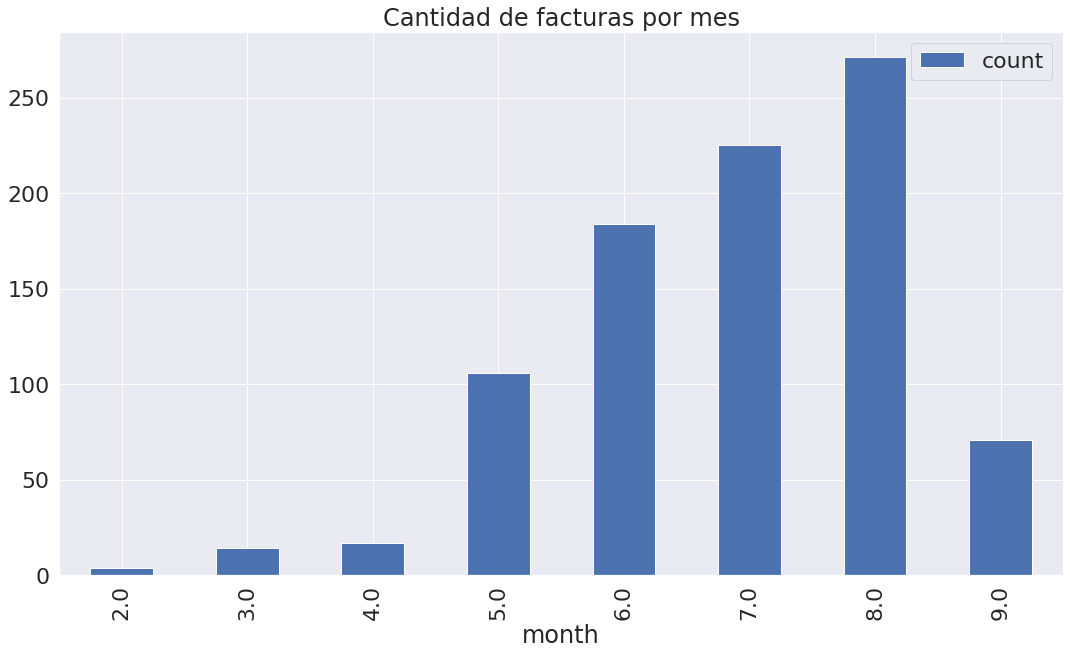

In [9]:
df_meses.plot(kind='bar',figsize=(18,10), y='count', x='month', title='Cantidad de facturas por mes')

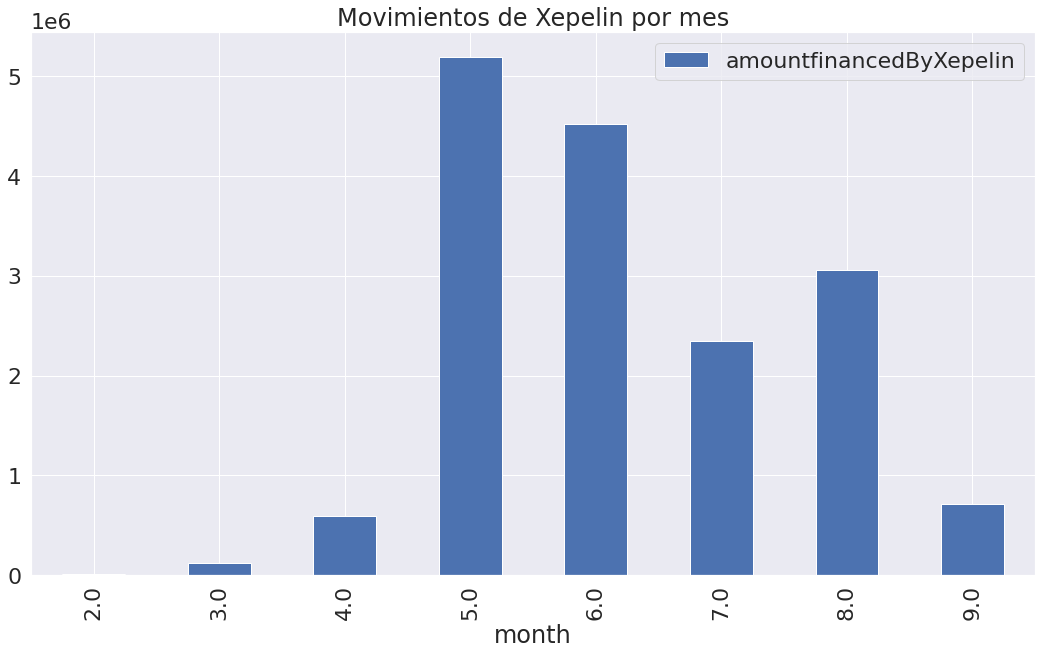

In [10]:
df_meses.plot(kind='bar',figsize=(18,10), y='amountfinancedByXepelin', x='month', title= 'Movimientos de Xepelin por mes')

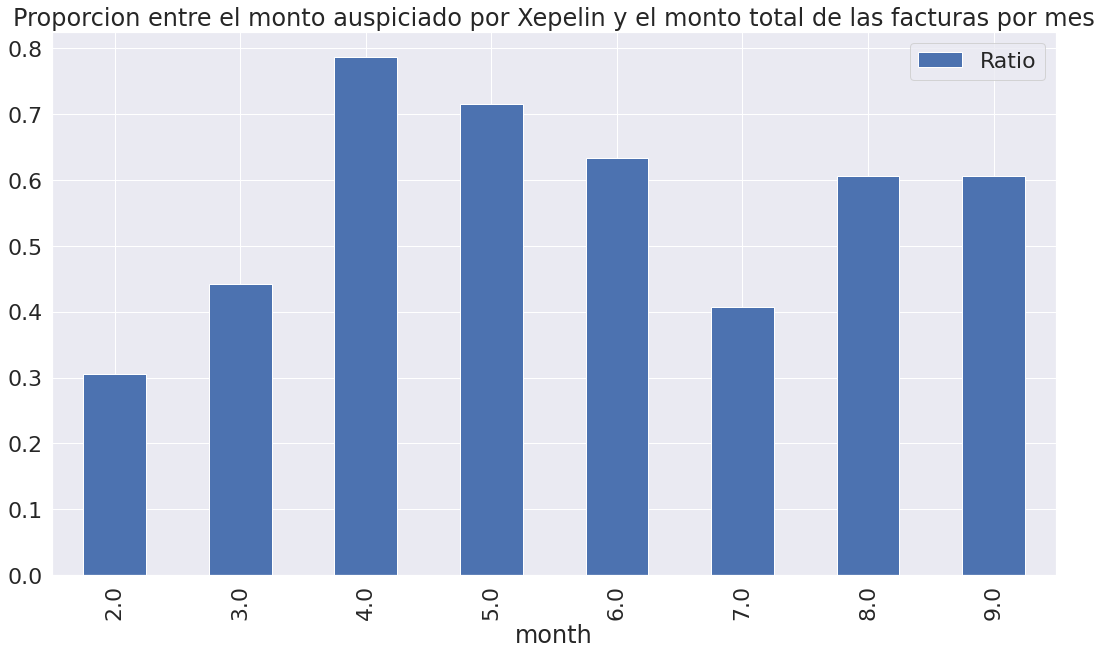

In [11]:
df_meses.plot(kind='bar',figsize=(18,10), y='Ratio', x='month', title= 'Proporcion entre el monto auspiciado por Xepelin y el monto total de las facturas por mes')

Se evalua cual es la proporción del financiamiento de Xepelin para el caso de las facturas en estado de Processing que corresponden a las facturas de Octubre.

In [12]:
df_proc = df[df['status']=='PROCESSING']
amount = df_proc['amount'].sum()
Xamount = df_proc['amountfinancedByXepelin'].sum()
print(amount)
print(Xamount)
print(f'Proporción de monto auspiciado por Xepelin y total de facturas para facturas en estado PROCESSING: {Xamount/amount}')

3380613.38
2011202.9999999998
Proporción de monto auspiciado por Xepelin y total de facturas para facturas en estado PROCESSING: 0.5949225107782067


Se grafica la distribución de los datos para estudiar posible outliers. En especifico para las cantidades de las facturas y las cantidades auspiciadas por Xepelin.

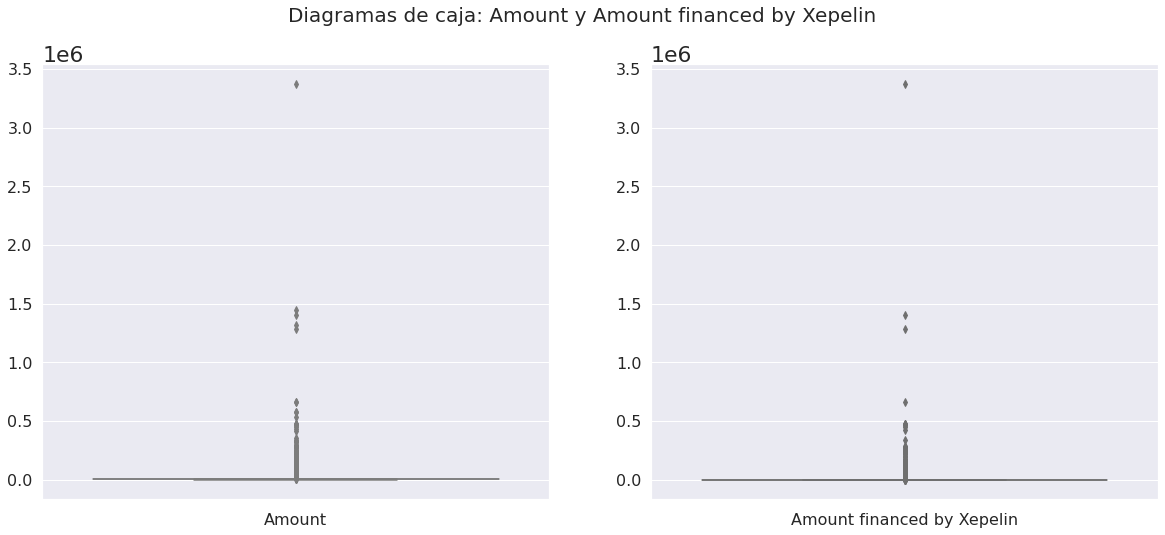

In [13]:
fig, ax = plt.subplots(1,2, figsize=(20,8))

sns.boxplot(data=df,y='amount',ax=ax[0],color='#d9dfc0')
sns.boxplot(data=df,y='amountfinancedByXepelin',ax=ax[1], color='#f29c7f')

ax[0].set_ylabel('')
ax[0].set_xlabel('Amount', fontsize=16)
ax[1].set_ylabel('')
ax[1].set_xlabel('Amount financed by Xepelin', fontsize=16)


for label in (ax[0].get_xticklabels() + ax[0].get_yticklabels()):
	label.set_fontsize(16)
for label in (ax[1].get_xticklabels() + ax[1].get_yticklabels()):
	label.set_fontsize(16)

fig.suptitle('Diagramas de caja: Amount y Amount financed by Xepelin', fontsize=20)

plt.show()